# Logistic Regression Recap

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

college=pd.read_csv('College_data.csv')
college.head()

,College,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [49]:
#college_clean=college[college['Grad.Rate']<=100] #remove outlier
college_clean = college.loc[college['Grad.Rate'] <= 100]
college_clean.head()

,College,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [50]:
cut_off=college_clean['Grad.Rate'].mean()
print(cut_off)

65.39561855670104


Any school with a graduation rate above 65.4% will be considered above average.

In [51]:
#college_clean['above_average']=college_clean['Grad.Rate'].apply(lambda x: 1 if x>= cut_off else 0)
college_clean.loc[college_clean['Grad.Rate'].notna(), ['above_average']] = college_clean['Grad.Rate'].apply(lambda x: 1 if x >= cut_off else 0)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [52]:
from sklearn.model_selection import train_test_split

X=college_clean[['Top10perc']]
y=college_clean.above_average

X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, train_size=0.8,random_state=100)
# Notice the additional argument, stratify=y, this is to ensure that both sets have the same proportion of target labels

In [53]:
from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

In [54]:
import numpy as np

## Interpret the model

Like with linear regression we can examine the intercept and coefficient of the model:

In [55]:
logreg.intercept_

array([-1.66275628])

The intercept is the output from the model when the values of the X variable/s is equal to zero

In [66]:
logreg.coef_

array([[0.06314022]])

If the coefficient is positive, it means as the value of the independent variable increases the odds it assigns to the default label increases, while the opposite is true for negative coefficients.

As discussed previously the output of the intercept and coefficients from the logistic regression model are in the form Ln(odds) which makes them dificult to interpret physically (in real life). Fortunately, logistic regression model has a function built in that returns values as probabilities. 

In [57]:
logreg.predict_proba([[0]])

array([[0.84060765, 0.15939235]])

[Probability of graduation rate being below average (0), Probability of graduation rate being above average (1)]

When X = 0 this function returns the intercept as a probability. This is the probability that a college has an above average graduation rate when 0% of the students were in the top 10% of their high school.

Scenario: 
Our university currently has 10% of students from the top 10percent of their high school class
What is the probability that our university has an above average grad rate?

In [58]:
logreg.predict_proba([[10]])

array([[0.73717832, 0.26282168]])

If we increased the proportion to 20% at our uni what would the probability be of our graduation rate being above average?

In [59]:
logreg.predict_proba([[20]])

array([[0.59867608, 0.40132392]])

You can see that as the proportion of students from the top 10% of high school increases the probability of being above average graduation rate increases as expected for a positive coefficient.

You may also notice the amount it increases is not linear, X increase by 10 each time but the probability increases by 0.10342933 in the first step then 0.13850224 in the second step.

In [60]:
for i in range(50):
    if i == 0:
        Prev=np.exp(logreg.intercept_[0])/(1+np.exp(logreg.intercept_[0]))
    else:
        Prev=current
    current=np.exp(logreg.intercept_[0]+logreg.coef_[0]*i)/(1+np.exp(logreg.intercept_[0]+logreg.coef_[0]*i))
    print(f"X= {i}%", "Probability:", current, "diff :", current-Prev)

X= 0% Probability: [0.15939235] diff : [0.]
X= 1% Probability: [0.16803528] diff : [0.00864294]
X= 2% Probability: [0.17704817] diff : [0.00901289]
X= 3% Probability: [0.18643615] diff : [0.00938798]
X= 4% Probability: [0.19620324] diff : [0.00976709]
X= 5% Probability: [0.20635223] diff : [0.01014899]
X= 6% Probability: [0.21688455] diff : [0.01053232]
X= 7% Probability: [0.22780014] diff : [0.01091559]
X= 8% Probability: [0.23909738] diff : [0.01129723]
X= 9% Probability: [0.25077292] diff : [0.01167555]
X= 10% Probability: [0.26282168] diff : [0.01204876]
X= 11% Probability: [0.27523667] diff : [0.01241499]
X= 12% Probability: [0.28800899] diff : [0.01277232]
X= 13% Probability: [0.30112775] diff : [0.01311876]
X= 14% Probability: [0.31458005] diff : [0.0134523]
X= 15% Probability: [0.32835095] diff : [0.01377091]
X= 16% Probability: [0.34242353] diff : [0.01407257]
X= 17% Probability: [0.35677885] diff : [0.01435532]
X= 18% Probability: [0.37139608] diff : [0.01461723]
X= 19% Proba

This is the probability output from our model and the difference between each probability as we incrimentally increase the independent variable/predictor/X from 0->50.
This will output a sigmoid curve which can be used for interpretation 

We can present this visually using the code below. We have taken the logistic regression output (creating a straight line) and converted it into probabilty form (creating the sigmoid curve) so that we can interpret our model.

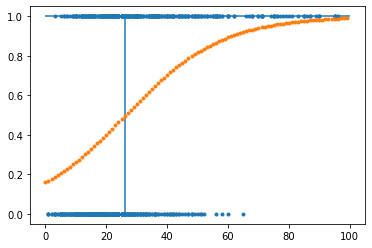

In [61]:
#np.exp(logreg.intercept_[0]+logreg.coef_[0]*i)/(1+np.exp(logreg.intercept_[0]+logreg.coef_[0]*i))
# this code above converts logistic regressin ln(odds) output to probability


probs = [np.exp(logreg.intercept_[0]+logreg.coef_[0]*i)/(1+np.exp(logreg.intercept_[0]+logreg.coef_[0]*i)) for i in range(0,100)]   
z=[i for i in range(0,100)]

# plot Top10perc against above_average with sigmoid curve and lines to indicate p=0.5 and Top10perc=26.3
fig,ax=plt.subplots()
ax.plot(college_clean.Top10perc,college_clean.above_average,'.')
ax.plot(z,probs,'.')
ax.vlines(26.3,ymin=0,ymax=1)
ax.hlines(1,xmin=0,xmax=100)
plt.show()
  

As highlighted previously the logistic regression model outputs the data in Ln(odds)(intercept and coeffiecient). This is hard for us to interpret but the reason it does is it realies on linear regression behind the scenes. This can be demonstrated below with equal incrimental steps in X leading to incrimental increases in y as y= mx + c.

In [62]:
for i in range(50):
    if i == 0:
        Prev=logreg.intercept_[0]
    else:
        Prev=current
    current=(logreg.coef_[0]*i) + logreg.intercept_[0] #y = mx + c
    print(f"X= {i}%", "current:", current, "diff :", current-Prev)

X= 0% current: [-1.66275628] diff : [0.]
X= 1% current: [-1.59961605] diff : [0.06314022]
X= 2% current: [-1.53647583] diff : [0.06314022]
X= 3% current: [-1.47333561] diff : [0.06314022]
X= 4% current: [-1.41019538] diff : [0.06314022]
X= 5% current: [-1.34705516] diff : [0.06314022]
X= 6% current: [-1.28391494] diff : [0.06314022]
X= 7% current: [-1.22077471] diff : [0.06314022]
X= 8% current: [-1.15763449] diff : [0.06314022]
X= 9% current: [-1.09449427] diff : [0.06314022]
X= 10% current: [-1.03135405] diff : [0.06314022]
X= 11% current: [-0.96821382] diff : [0.06314022]
X= 12% current: [-0.9050736] diff : [0.06314022]
X= 13% current: [-0.84193338] diff : [0.06314022]
X= 14% current: [-0.77879315] diff : [0.06314022]
X= 15% current: [-0.71565293] diff : [0.06314022]
X= 16% current: [-0.65251271] diff : [0.06314022]
X= 17% current: [-0.58937248] diff : [0.06314022]
X= 18% current: [-0.52623226] diff : [0.06314022]
X= 19% current: [-0.46309204] diff : [0.06314022]
X= 20% current: [-0

We can present this visually using the code below. We have taken the logistic regression output (creating a straight line) and plotted it below.

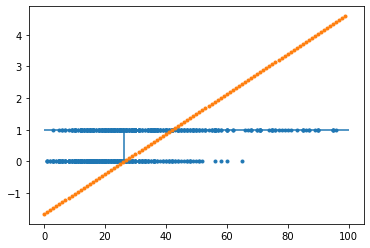

In [68]:
# logreg.intercept_[0]+logreg.coef_[0]*i
# this line outputs the logistic regression ln(odds)

lnOdds = [(logreg.intercept_[0]+logreg.coef_[0]*i) for i in range(0,100)]   
z=[i for i in range(0,100)] 

# plot Top10perc against above_average with sigmoid curve and lines to indicate p=0.5 and Top10perc=26.3
fig,ax=plt.subplots()
ax.plot(college_clean.Top10perc,college_clean.above_average,'.')
ax.plot(z,lnOdds,'.')
ax.vlines(26.3,ymin=0,ymax=1)
ax.hlines(1,xmin=0,xmax=100)
plt.show()